# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Importing Dataset

In [2]:
# bank dataset is in one column we are transferd into seprate columns using Excel.
bank = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\6 Logistic Regression\\bank-full.csv")

In [3]:
bank.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# EDA

In [4]:
# Check Null Values
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# Categorical Data Convert into Numerical 
bank1 = pd.get_dummies(bank,columns=['job','marital','education','contact','month','poutcome'])
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [7]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [8]:
# Default, Housing, Loan and y Column are Yes or no Form then Covert into 1 or 0
bank1['default'] = np.where(bank1['default'].str.contains('yes'),1,0)
bank1['housing'] = np.where(bank1['housing'].str.contains('yes'),1,0)
bank1['loan'] = np.where(bank1['loan'].str.contains('yes'),1,0)
bank1['y'] = np.where(bank1['y'].str.contains('yes'),1,0)

In [9]:
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [10]:
# all columns datatypes are Integers 
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [11]:
bank1.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,...,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.004927,-0.022967,0.035526,-0.000816
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,...,0.007582,-0.013991,-0.002946,0.006129,-0.017454,-0.013953,-0.026389,-0.014445,-0.023344,0.039490
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,...,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922,0.011857,0.008466,0.035240,-0.030271
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,...,-0.102298,-0.066284,0.427980,0.001152,-0.085439,-0.076343,0.106795,0.039710,-0.091360,-0.063755
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,...,-0.022749,-0.029761,-0.027867,0.019154,-0.030097,-0.033663,-0.002186,-0.009099,-0.053713,0.031406
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,...,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.068700,-0.032952,-0.030321,0.086256
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,...,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077,-0.018925,-0.001958,0.042389,-0.003491
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,...,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,-0.088131,-0.020107,-0.057486,0.107965
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,...,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427,0.701052,0.389791,0.228539,-0.869962
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,...,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990,0.350627,0.306615,0.201424,-0.532763


# Splitting Data

In [12]:
X = pd.concat([bank1.iloc[:,:10],bank1.iloc[:,11:]],axis=1)
y = bank1.iloc[:,10]

In [13]:
X

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [15]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3344,41,0,849,1,0,15,72,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
17965,49,0,1415,1,0,30,269,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
18299,42,0,3842,0,0,31,130,4,-1,0,...,0,0,0,0,0,0,0,0,0,1
10221,37,0,-119,1,0,11,375,11,-1,0,...,1,0,0,0,0,0,0,0,0,1
32192,56,0,3498,0,0,15,264,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,0,1059,0,0,18,2093,1,-1,0,...,1,0,0,0,0,0,0,0,0,1
44732,23,0,508,0,0,8,210,1,92,1,...,0,0,0,0,0,1,1,0,0,0
38158,34,0,1317,1,0,15,239,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
860,33,0,165,0,0,7,111,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [17]:
y_train

3344     0
17965    0
18299    0
10221    0
32192    1
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: y, Length: 36168, dtype: int32

In [18]:
X_test

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3776,40,0,580,1,0,16,192,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
9928,47,0,3644,0,0,9,83,2,-1,0,...,1,0,0,0,0,0,0,0,0,1
33409,25,0,538,1,0,20,226,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
31885,42,0,1773,0,0,9,311,1,336,1,...,0,0,0,0,0,0,1,0,0,0
15738,56,0,217,0,1,21,121,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,47,0,1890,0,0,8,161,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
38732,32,0,217,1,0,15,692,3,-1,0,...,0,0,1,0,0,0,0,0,0,1
5654,52,0,0,1,0,26,206,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3779,40,0,783,1,1,16,171,2,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [19]:
y_test

3776     0
9928     0
33409    0
31885    0
15738    0
        ..
13353    0
38732    1
5654     0
3779     0
11677    0
Name: y, Length: 9043, dtype: int32

# Model Building

In [20]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train,y_train)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
y_test

3776     0
9928     0
33409    0
31885    0
15738    0
        ..
13353    0
38732    1
5654     0
3779     0
11677    0
Name: y, Length: 9043, dtype: int32

In [24]:
Test = pd.DataFrame({'actual_y':y_test,'Predicted_y':y_pred})

In [25]:
Test

,actual_y,Predicted_y
3776,0,0
9928,0,0
33409,0,0
31885,0,1
15738,0,0
...,...,...
13353,0,0
38732,1,0
5654,0,0
3779,0,0


# Accuracy

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score
cm = confusion_matrix(y_test , y_pred)
acc = accuracy_score(y_test,y_pred)
cm,acc

(array([[7798,  154],
        [ 846,  245]], dtype=int64),
 0.8894172287957536)

<AxesSubplot:>

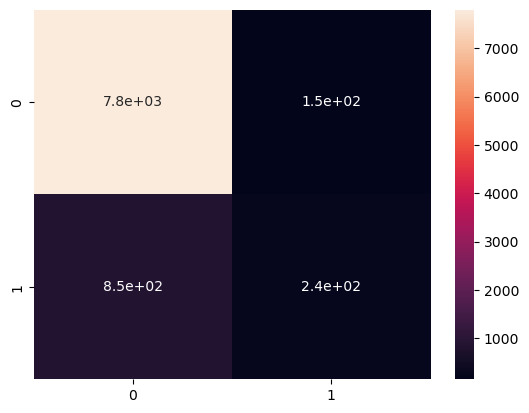

In [27]:
sns.heatmap(cm,annot=True)

In [28]:
# ROC 
roc = roc_curve(y_test,y_pred)
roc

(array([0.       , 0.0193662, 1.       ]),
 array([0.        , 0.22456462, 1.        ]),
 array([2, 1, 0]))

In [29]:
# ROC AUC Score
auc = roc_auc_score(y_test,y_pred)
auc

0.6025992112159667

In [30]:
# Predict class Probability
prob = classifier.predict_proba(X_test)[:,1]
prob

array([0.01817003, 0.03415942, 0.15073122, ..., 0.02215317, 0.01482803,
       0.04692055])

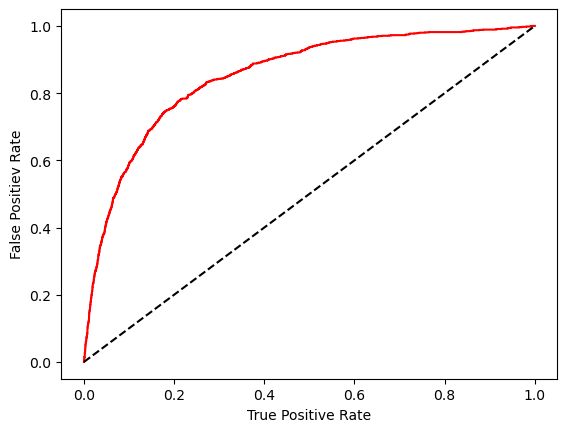

In [31]:
# ROC Curve Plotting
fpr , tpr, threshold = roc_curve(y_test,classifier.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],'k--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positiev Rate')
plt.show()